<a href="https://colab.research.google.com/github/YorkJong/vistock/blob/feature%2Ftaiwan-stock-name/notebooks/vistock_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### vistock -- an open source package that provides a lot of plot() functions to visualize stocks.

### Install vistock from GitHub (免費版Colab會固定時間清掉安裝的東西，所以重安裝是新連線後最先要做的事)

In [1]:
%pip install git+https://github.com/YorkJong/vistock.git@feature/taiwan-stock-name

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/YorkJong/vistock.git (to revision feature/taiwan-stock-name) to /tmp/pip-req-build-frawjywh
  Running command git clone --filter=blob:none --quiet https://github.com/YorkJong/vistock.git /tmp/pip-req-build-frawjywh
  Running command git checkout -b feature/taiwan-stock-name --track origin/feature/taiwan-stock-name
  Switched to a new branch 'feature/taiwan-stock-name'
  Branch 'feature/taiwan-stock-name' set up to track remote branch 'feature/taiwan-stock-name' from 'origin'.
  Resolved https://github.com/YorkJong/vistock.git to commit 37d8bf1690eabbba507eb86f1d42a520cf7dd710
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.1/73.1 KB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 26.1 MB/s eta 0:00:00
     ━━━━

### Install TA-Lib optionally used only by vistock.mpl.rsi module (安裝較費時，沒要看RSI 技術指標可以不裝)

In [ ]:
import sys
import platform

if 'google.colab' in sys.modules:       # Colab
    !wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
    !tar -xzvf ta-lib-0.4.0-src.tar.gz
    %cd ta-lib
    !./configure --prefix=/usr
    !make
    !make install
elif platform.system() == "Darwin":     # macOS
    !brew install ta-lib

%pip install Ta-Lib

References:
* [Installation of Ta-Lib in Python: A Complete Guide for all Platforms](https://blog.quantinsti.com/install-ta-lib-python/)

### Usage Explanation

#### Parameters

kind (圖種類): 
* To select a kind of from charts

symbol (股票代碼): 
* The symbol of a stock (e.g., TSLA) 
* This also suport some to crypto to USD pairs (e.g., BTC-USD, ETH-USD)

period (整張圖的繪製區間): 
* the period of data to download

interval (每筆k線資料的間隔): 
* the interval of an OHLC data item

legend_location （圖例說明匡的位置）: 
* the loacation of the legend

total_bins （價量累積直方圖中價格區間分組數量）: 
* the total bins on a Price by Volume chart (so-called Volume Profile)

#### Colab Forms 
* Forms provide an easy way to parameterize code.
* Forms are Google Colab specific features extending from the original Jupyter Notebooks.
* After running a cell manually, it will auto-run if you change the selected value.


### Plot with mplfinance

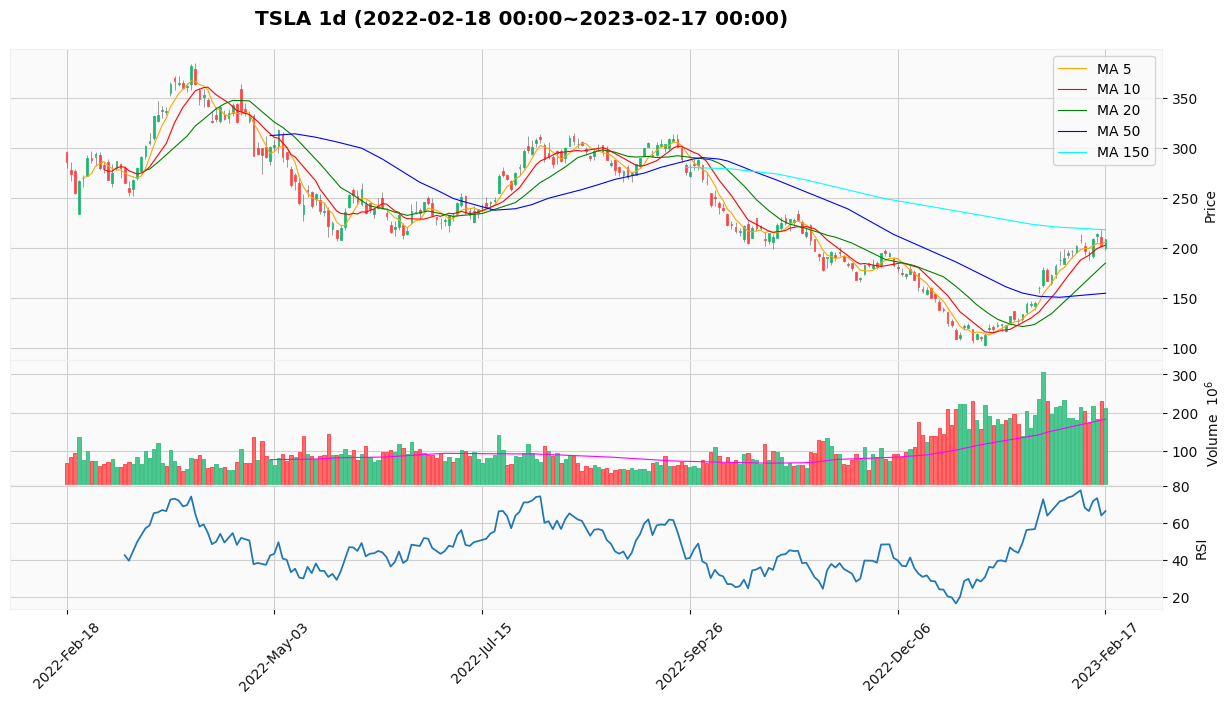

In [8]:
#@title Interval of Inter Days { run: "auto" }
kind = "Price, Volume, RSI" #@param ["Price, Volume, RSI", "Price by Volume"]
symbol = "TSLA" #@param ["TSLA", "MSFT", "AAPL", "GOOG", "TQQQ", "SOXL", "TSM", "台積電", "2330", "元太", "BTC-USD", "ETH-USD"] {allow-input: true}
period = "1y" #@param ["3mo", "6mo", "1y", "2y", "5y", "max"]
interval = "1d" #@param ["1d", "5d", "1wk", "1mo"]
legend_location = "best" #@param ["best", "upper right", "upper left", 'lower left', 'lower right', 'right', 'center left', 'center right', 'lower center', 'upper center', 'center']
total_bins = 28 #@param ["8", "28", "33", "42", "58", "69"] {type:"raw", allow-input: true}
            
import vistock.mpl as vsm

tbl = {
    'Price, Volume, RSI': vsm.rsi,  
    'Price by Volume': vsm.pbv,  
}

module = tbl[kind]
if module == vsm.pbv:
    module.plot(symbol, period=period, interval=interval, 
                legend_loc=legend_location, total_bins=total_bins)
else:
    module.plot(symbol, period=period, interval=interval, 
                legend_loc=legend_location)


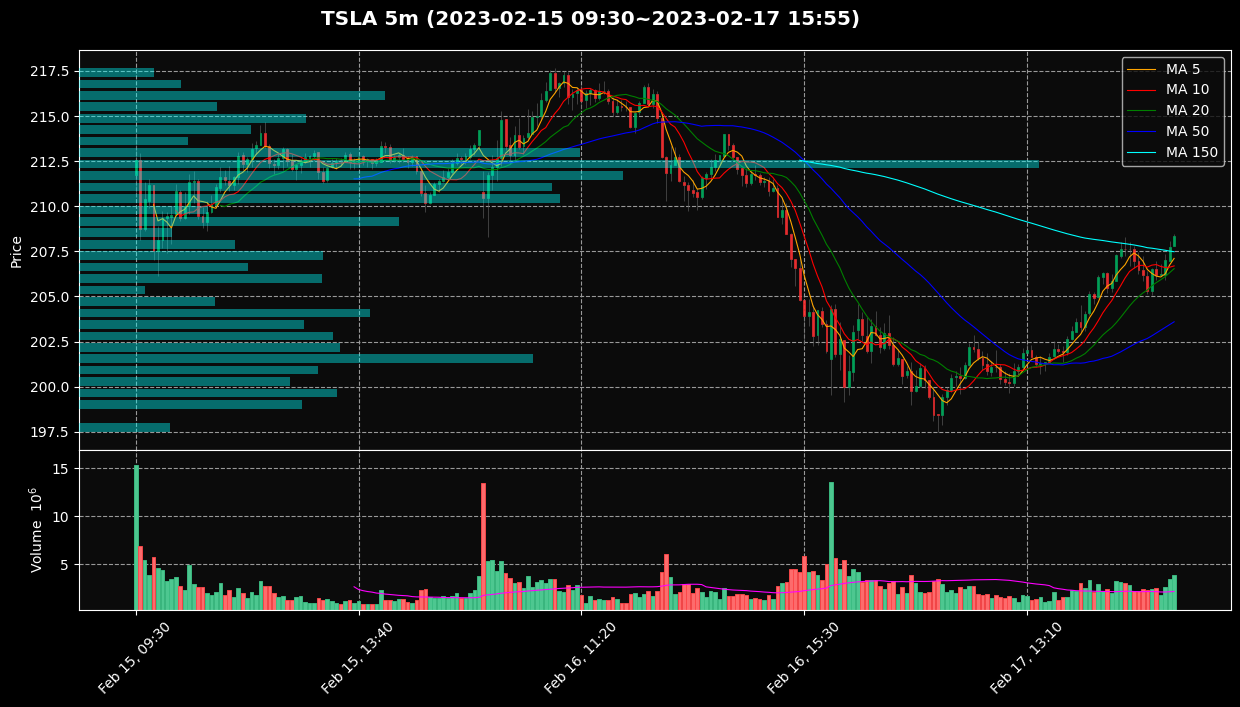

In [5]:
#@title Interval of Intra Day { run: "auto" }
kind = "Price by Volume"  #@param ["Price, Volume, RSI", "Price by Volume"]
symbol = "TSLA" #@param ["TSLA", "MSFT", "AAPL", "GOOG", "TQQQ", "SOXL", "TSM", "台積電", "2330", "元太", "BTC-USD", "ETH-USD"] {allow-input: true}
period = "3d" #@param ["1d", "2d", "3d", "4d", "5d", "6d", "7d", "10d", "20d", "40d", "60d"]
interval = "5m" #@param ["2m", "5m", "15m", "30m", "60m", "90m", "1h"]
legend_location = "best" #@param ["best", "upper right", "upper left", 'lower left', 'lower right', 'right', 'center left', 'center right', 'lower center', 'upper center', 'center']
total_bins = 33 #@param ["8", "28", "33", "42", "58", "69"] {type:"raw", allow-input: true}            

import vistock.mpl as vsm

tbl = {
    'Price, Volume, RSI': vsm.rsi,  
    'Price by Volume': vsm.pbv,  
}

module = tbl[kind]
if module == vsm.pbv:
    module.plot(symbol, period=period, interval=interval, 
                legend_loc=legend_location, total_bins=total_bins)
else:
    module.plot(symbol, period=period, interval=interval, 
                legend_loc=legend_location)

### Plot with Plotly

In [10]:
#@title Interval of Inter Days { run: "auto" }
kind = "Price by Volume with 2 Subplots" #@param ["Price and Volume Overlaid", "Price and Volume Separated", "Price by Volume with 4 Subplots", "Price by Volume with 2 Subplots"]
symbol = "\u5143\u592A" #@param ["TSLA", "MSFT", "AAPL", "GOOG", "TQQQ", "SOXL", "TSM", "台積電", "2330", "元太", "BTC-USD", "ETH-USD"] {allow-input: true}
period = "1y" #@param ["3mo", "6mo", "1y", "2y", "5y", "max"]
interval = "1d" #@param ["1d", "5d", "1wk", "1mo"]
total_bins = 42 #@param ["8", "28", "33", "42", "58", "69"] {type:"raw", allow-input: true}
hides_nontrading = True #@param {type:"boolean"}

import vistock.plotly as vsp

tbl = {
    'Price and Volume Overlaid': vsp.pv1s,     
    'Price and Volume Separated': vsp.pv2s,     
    'Price by Volume with 4 Subplots': vsp.pbv4s,    
    'Price by Volume with 2 Subplots': vsp.pbv2s,    
}

module = tbl[kind]
if module in (vsp.pbv4s, vsp.pbv2s):
    module.plot(symbol, period=period, interval=interval, total_bins=total_bins, 
                hides_nontrading=hides_nontrading)
else:
    module.plot(symbol, period=period, interval=interval, 
                hides_nontrading=hides_nontrading)

In [3]:
#@title Interval of Intra Day { run: "auto" }
kind = "Price by Volume with 2 Subplots" #@param ["Price and Volume Overlaid", "Price and Volume Separated", "Price by Volume with 4 Subplots", "Price by Volume with 2 Subplots"]
symbol = "TSLA" #@param ["TSLA", "MSFT", "AAPL", "GOOG", "TQQQ", "SOXL", "TSM", "台積電", "2330", "元太", "BTC-USD", "ETH-USD"] {allow-input: true}
period = "7d" #@param ["1d", "2d", "3d", "4d", "5d", "6d", "7d", "10d", "20d", "40d", "60d"]
interval = "1h" #@param ["2m", "5m", "15m", "30m", "60m", "90m", "1h"]
total_bins = 28 #@param ["8", "28", "33", "42", "58", "69"] {type:"raw", allow-input: true}
hides_nontrading = True #@param {type:"boolean"}

import vistock.plotly as vsp

tbl = {
    'Price and Volume Overlaid': vsp.pv1s,     
    'Price and Volume Separated': vsp.pv2s,     
    'Price by Volume with 4 Subplots': vsp.pbv4s,    
    'Price by Volume with 2 Subplots': vsp.pbv2s,    
}

module = tbl[kind]
if module in (vsp.pbv4s, vsp.pbv2s):
    module.plot(symbol, period=period, interval=interval, total_bins=total_bins, 
                hides_nontrading=hides_nontrading)
else:
    module.plot(symbol, period=period, interval=interval, 
                hides_nontrading=hides_nontrading)

In [2]:
from vistock import tw

tw.similar_stocks('2330')

[('台積電國泰27購08', '030023'),
 ('台積電國泰27購09', '030024'),
 ('台積電元大2A購21', '030044'),
 ('台積電元大2B購08', '030045'),
 ('台積電元大23售66', '03008P'),
 ('台積電國票26購04', '030104'),
 ('台積電國票27購02', '030105'),
 ('台積電元大29購28', '030135'),
 ('台積電元大2A購22', '030136'),
 ('台積電元大2B購09', '030137'),
 ('台積電富邦26購09', '030159'),
 ('台積電群益27購09', '030172'),
 ('台積電群益27購10', '030173'),
 ('台積電群益28購03', '030174'),
 ('台積電兆豐27購06', '030203'),
 ('台積電麥證25購09', '030217'),
 ('台積電麥證25購10', '030218'),
 ('台積電麥證25購11', '030219'),
 ('台積電麥證26購08', '030220'),
 ('台積電元大29購29', '030255'),
 ('台積電元大2A購23', '030256'),
 ('台積電元大2B購10', '030257'),
 ('台積電國票26購05', '030309'),
 ('台積電永豐27售06', '03035U'),
 ('台積電元大29購30', '030406'),
 ('台積電元大2A購24', '030407'),
 ('台積電元大2B購11', '030408'),
 ('台積電國票27購03', '030433'),
 ('台積電法興25購03', '030468'),
 ('台積電法興25購04', '030469'),
 ('台積電國泰28售07', '03049U'),
 ('台積電元大25購39', '030507'),
 ('台積電元大29購31', '030508'),
 ('台積電富邦26購11', '030528'),
 ('台積電凱基26售24', '03052U'),
 ('台積電凱基29售02', '03053U'),
 ('台積電康和25購08', '030555'),
 